<a href="https://colab.research.google.com/github/Wanita-8943/Project_2023/blob/main/Predict_1F_2e_4_16_0_2_Female18_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 837, done.
remote: Counting objects: 100% (359/359), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 837 (delta 255), reused 328 (delta 235), pack-reused 478
Receiving objects: 100% (837/837), 13.82 MiB | 21.73 MiB/s, done.
Resolving deltas: 100% (495/495), done.
/content/efficientnet_keras_transfer_learning


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Model/1F_2e-4_16_0.2_Female18_500.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [5]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Model/1F_2e-4_16_0.2_Female18_500.h5')
height = width = model.input_shape[1]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
df = pd.read_csv (f'/content/drive/MyDrive/cut_panoramic/Data/New_Data_Female125.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
0,1,1,7,Y07F,0,V1.jpg,/content/drive/My Drive/TVT_Female125/train/Y0...,Female,Both
1,2,1,7,Y07F,0,Flip_V1.jpg,/content/drive/My Drive/TVT_Female125/train/Y0...,Female,Both
2,3,2,7,Y07F,0,V2.jpg,/content/drive/My Drive/TVT_Female125/train/Y0...,Female,Both
3,4,2,7,Y07F,0,Flip_V2.jpg,/content/drive/My Drive/TVT_Female125/train/Y0...,Female,Both
4,5,3,7,Y07F,0,V3.jpg,/content/drive/My Drive/TVT_Female125/train/Y0...,Female,Both
...,...,...,...,...,...,...,...,...,...
2370,121,65,25,Y25F,18,Flip_J145.jpg,/content/drive/My Drive/TVT_Female125/test/Y25...,Female,Lt
2371,122,66,25,Y25F,18,Flip_J149.jpg,/content/drive/My Drive/TVT_Female125/test/Y25...,Female,Lt
2372,123,67,25,Y25F,18,Flip_J158.jpg,/content/drive/My Drive/TVT_Female125/test/Y25...,Female,Lt
2373,124,68,25,Y25F,18,Flip_J177.jpg,/content/drive/My Drive/TVT_Female125/test/Y25...,Female,Lt


In [7]:
train = df[df['Fig_Age'].between(1,75)]
test = df[df['Fig_Age'].between(101,125)]

In [8]:
DATA_PATH = "/content/drive/My Drive/TVT_Female125"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/TVT_Female125/train
/content/drive/My Drive/TVT_Female125/test


In [9]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Class_Re',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode = 'other')

#label
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# print(labels)

Found 1425 validated image filenames.


In [10]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
100,101,51,7,Y07F,0,V67.jpg,/content/drive/My Drive/TVT_Female125/test/Y07...,Female,Both
101,102,51,7,Y07F,0,Flip_V67.jpg,/content/drive/My Drive/TVT_Female125/test/Y07...,Female,Both
102,103,52,7,Y07F,0,V68.jpg,/content/drive/My Drive/TVT_Female125/test/Y07...,Female,Both
103,104,52,7,Y07F,0,Flip_V68.jpg,/content/drive/My Drive/TVT_Female125/test/Y07...,Female,Both
104,105,53,7,Y07F,0,V69.jpg,/content/drive/My Drive/TVT_Female125/test/Y07...,Female,Both
...,...,...,...,...,...,...,...,...,...
2370,121,65,25,Y25F,18,Flip_J145.jpg,/content/drive/My Drive/TVT_Female125/test/Y25...,Female,Lt
2371,122,66,25,Y25F,18,Flip_J149.jpg,/content/drive/My Drive/TVT_Female125/test/Y25...,Female,Lt
2372,123,67,25,Y25F,18,Flip_J158.jpg,/content/drive/My Drive/TVT_Female125/test/Y25...,Female,Lt
2373,124,68,25,Y25F,18,Flip_J177.jpg,/content/drive/My Drive/TVT_Female125/test/Y25...,Female,Lt


In [11]:
act = test['Class_Re'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [12]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [13]:
predict_image(path[0])[0]

1/1 [==============================] - 8s 8s/step


2.7241335

In [14]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 31ms/step


In [15]:
pred_list

[2.7241335,
 2.7241335,
 2.7241354,
 2.7241354,
 2.7254927,
 2.724414,
 2.7241507,
 2.7241633,
 2.7241335,
 2.7241337,
 2.7241397,
 2.7241893,
 2.724149,
 2.7241347,
 2.7241335,
 2.7241337,
 2.7241335,
 2.7241335,
 2.7241397,
 2.7241337,
 2.7241366,
 2.7241335,
 2.7241724,
 2.72419,
 2.7241335,
 2.724138,
 2.7241337,
 2.7241368,
 2.7241347,
 2.737774,
 2.7245378,
 2.7241347,
 2.7241397,
 2.7241342,
 2.7241344,
 2.7241354,
 2.7241378,
 2.7241335,
 2.7241335,
 2.7241335,
 2.7241335,
 2.724135,
 2.7241335,
 2.7241943,
 2.724135,
 2.724163,
 2.724631,
 2.7241335,
 2.7241335,
 2.7241647,
 2.7242212,
 2.72993,
 2.7241356,
 2.7241335,
 2.724237,
 2.7242718,
 2.7241335,
 2.7241335,
 2.7241368,
 2.7241342,
 2.724141,
 2.7241352,
 2.7241342,
 2.7241335,
 2.7241397,
 2.7241354,
 2.7243772,
 2.7241457,
 2.7241375,
 2.7241335,
 2.7241337,
 2.7241337,
 2.7241335,
 2.7241335,
 2.7241719,
 2.7241337,
 2.72414,
 2.7241368,
 2.7241976,
 2.7242746,
 2.7241337,
 2.7241387,
 2.7241335,
 2.7241337,
 2.72430

In [16]:
print(type(pred_list))

<class 'list'>


In [17]:
pred_int = np.around(pred_list)

In [18]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [19]:
pred

array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        5.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4., 10.,  4.,  3.,  3.,
        3.,  3.,  4.,  4.,  3.,  3.,  3.,  4., 10.,  6., 12., 10., 11.,
        3.,  3.,  3.,  3.,  3.,  3.,  4.,  5.,  4.,  3.,  6., 12.,  5.,
        3.,  3.,  3.,  3.,  3.,  3.,  8.,  4.,  3.,  8., 10., 11

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 12.631578947368421%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        25
           3       0.15      1.00      0.26        25
           4       0.05      0.04      0.04        25
           5       0.05      0.04      0.05        25
           6       0.18      0.08      0.11        25
           7       0.18      0.12      0.14        25
           8       0.25      0.12      0.16        25
           9       0.20      0.16      0.18        25
          10       0.12      0.08      0.10        25
          11       0.17      0.40      0.24        25
          12       0.07      0.36      0.12        25
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        25
          16       0.00      0.00      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Predicted label')

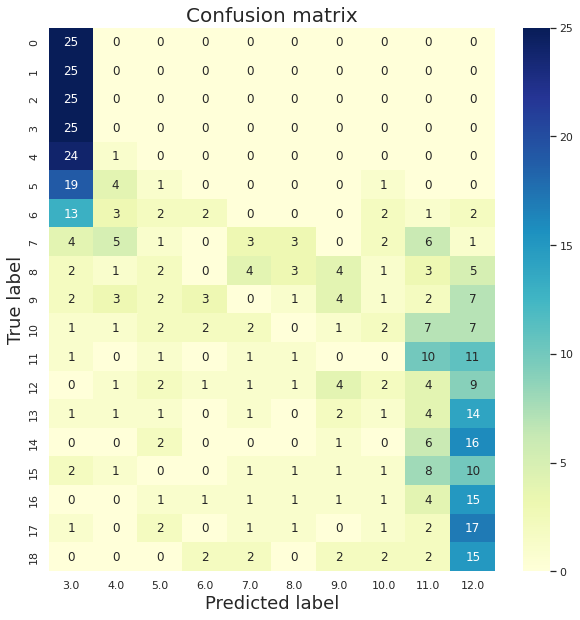

In [21]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)